<a href="https://colab.research.google.com/github/NgHgHai/20130166_NguyenHoangHai_ML_2023/blob/main/Lab_7_20130166_NguyenHoangHai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# ket noi driver


In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_2023/Lab7'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_2023/Lab7


#Import libraries

In [14]:
# code
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from numpy import average
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from sklearn import svm
from prettytable import PrettyTable

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [5]:
# load dataset
iris = datasets.load_iris()
X= iris['data']
y= iris['target']

In [15]:
#code

clf = svm.SVC(kernel='sigmoid',random_state = 0)
# scores = cross_validate(clf,X,y,scoring ='accuracy', cv=10)
scores = cross_validate(clf,X,y,scoring ='recall_macro', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666667


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [11]:
#code
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

clf=RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf,X,y,scoring ='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

[ 119.265   49.16  1180.161  960.007]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['fit_time', 'score_time', 'test_score']
0.9533333333333334


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.47223015873017, 39.03998724608726, 34.29971212121213, 30.06311061745273, 28.271721728563833, 26.09432474054042, 24.742517259701096, 22.793982467480923, 21.690983282068807, 20.33545332204028]


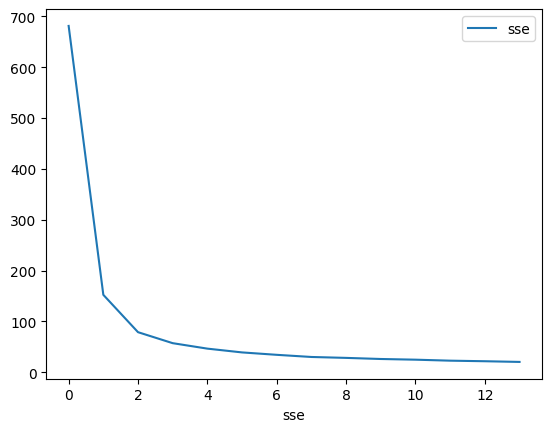

In [62]:
# SSE la khoảng cách từ tâm đến các phần tử trong cụm, SSE càng nhỏ các cụm càng tốt
sse = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(iris.data)
  sse.append(kmeans.inertia_)
plt.plot(sse,label='sse')
plt.xlabel("sse")
plt.legend()
print(sse)

In [33]:
# code
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(iris.data)
clusters = kmeans.predict(iris.data)
kmeans.cluster_centers_.shape

labels = np.zeros_like(clusters)
print(labels)
for i in range(10):
  mask = (clusters == i)
  # print(mask)
  labels[mask] = mode(iris.target[mask])[0]
  # print(labels[mask])
accuracy_score(iris.target, labels)
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-33-2996f27e423d>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(iris.target[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [63]:
# code
# knn
name = ['accuracy','precision_macro','recall_macro','f1_macro']

knn = KNeighborsClassifier(n_neighbors = 5)
knn_log=[]
for i in range(4) :
  print(name[i])
  scores = cross_validate(knn,X,y,scoring =name[i], cv=10)
  knn_log.append(np.mean(scores['test_score']))
  print(np.mean(scores['test_score']))

# # randomforest
rdf=RandomForestClassifier(n_estimators=100)
rdf_log =[]
for i in range(4) :
  print(name[i])
  scores = cross_validate(rdf,X,y,scoring =name[i], cv=10)
  rdf_log.append(np.mean(scores['test_score']))
  print(np.mean(scores['test_score']))

# NaiveBayes -------------------
gau_NB = GaussianNB()
gau_NB_log =[]
for i in range(4) :
  print(name[i])
  scores = cross_validate(gau_NB,X,y,scoring =name[i], cv=10)
  gau_NB_log.append(np.mean(scores['test_score']))
  print(np.mean(scores['test_score']))
gau_NB_log
#display
gau_NB_log.insert(0,'gau')
knn_log.insert(0,'knn')
rdf_log.insert(0,'Random forest')
t= PrettyTable(['algorithms (Without)','acc','pre','recall','f1'])
t.add_row(gau_NB_log)
t.add_row(knn_log)
t.add_row(rdf_log)
print(t)



accuracy
0.9666666666666668
precision_macro
0.9738095238095239
recall_macro
0.9666666666666666
f1_macro
0.9659090909090908
accuracy
0.9666666666666666
precision_macro
0.9588888888888889
recall_macro
0.9666666666666666
f1_macro
0.9597306397306398
accuracy
0.9533333333333334
precision_macro
0.9626984126984126
recall_macro
0.9533333333333334
f1_macro
0.9524410774410775
+----------------------+--------------------+--------------------+--------------------+--------------------+
| algorithms (Without) |        acc         |        pre         |       recall       |         f1         |
+----------------------+--------------------+--------------------+--------------------+--------------------+
|         gau          | 0.9533333333333334 | 0.9626984126984126 | 0.9533333333333334 | 0.9524410774410775 |
|         knn          | 0.9666666666666668 | 0.9738095238095239 | 0.9666666666666666 | 0.9659090909090908 |
|    Random forest     | 0.9666666666666666 | 0.9588888888888889 | 0.9666666666666666 

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.